In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berlevag
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | talcahuano
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | lima
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | killybegs
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | santa maria
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | berbera
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Se

Processing Record 35 of Set 4 | katherine
Processing Record 36 of Set 4 | powell
Processing Record 37 of Set 4 | artigas
Processing Record 38 of Set 4 | madinat sittah uktubar
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | shenjiamen
Processing Record 42 of Set 4 | raahe
Processing Record 43 of Set 4 | ugoofaaru
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | kazanka
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | suoyarvi
Processing Record 49 of Set 4 | khandagayty
Processing Record 50 of Set 4 | ormara
Processing Record 1 of Set 5 | havre-saint-pierre
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | lensk
Processing Record 4 of Set 5 | sergeyevka
Processing Record 5 of Set 5 | longyan
Processing Record 6 of Set 5 | yuli
Processing Record 7 of Set 5 | saint anthony
Processing Recor

Processing Record 22 of Set 8 | ambovombe
Processing Record 23 of Set 8 | mundo nuevo
Processing Record 24 of Set 8 | nantucket
Processing Record 25 of Set 8 | vermilion
Processing Record 26 of Set 8 | grand-lahou
Processing Record 27 of Set 8 | lovozero
Processing Record 28 of Set 8 | san roque
Processing Record 29 of Set 8 | river falls
Processing Record 30 of Set 8 | yulara
Processing Record 31 of Set 8 | osakarovka
Processing Record 32 of Set 8 | adre
Processing Record 33 of Set 8 | zhanaozen
Processing Record 34 of Set 8 | sasykoli
Processing Record 35 of Set 8 | diamantino
Processing Record 36 of Set 8 | maldonado
Processing Record 37 of Set 8 | zhaocheng
City not found. Skipping...
Processing Record 38 of Set 8 | maypangdan
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | bellefontaine
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | ukiah
Processing Record 43 of Set 8 | shimoda
Processing Record 44 of Set 8 | san miguel
Processi

Processing Record 14 of Set 12 | mackenzie
Processing Record 15 of Set 12 | eskisehir
Processing Record 16 of Set 12 | grindavik
Processing Record 17 of Set 12 | hirara
Processing Record 18 of Set 12 | aquiraz
Processing Record 19 of Set 12 | tolaga bay
Processing Record 20 of Set 12 | chimbote
Processing Record 21 of Set 12 | rapid city
Processing Record 22 of Set 12 | roma
Processing Record 23 of Set 12 | galgani
City not found. Skipping...
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | ekhabi
Processing Record 26 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 27 of Set 12 | morro bay
Processing Record 28 of Set 12 | kisangani
Processing Record 29 of Set 12 | batticaloa
Processing Record 30 of Set 12 | oksfjord
Processing Record 31 of Set 12 | kodino
Processing Record 32 of Set 12 | henties bay
Processing Record 33 of Set 12 | tilichiki
Processing Record 34 of Set 12 | we
City not found. Skipping...
Processing Record 35 of Set 12 |

In [ ]:
# Print the city count to confirm sufficient count.
len(city_data)

555

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Berlevag,70.8578,29.0864,26.55,86,40,10.36,NO,2021-10-24 21:25:14
1,Hermanus,-34.4187,19.2345,57.90,72,0,8.97,ZA,2021-10-24 21:25:14
2,Cabo San Lucas,22.8909,-109.9124,89.62,57,20,17.27,MX,2021-10-24 21:25:14
3,Talcahuano,-36.7167,-73.1167,60.48,72,0,19.57,CL,2021-10-24 21:25:14
4,Cidreira,-30.1811,-50.2056,64.96,60,0,9.86,BR,2021-10-24 21:25:15
5,Busselton,-33.6500,115.3333,56.05,83,100,10.78,AU,2021-10-24 21:25:15
6,Bluff,-46.6000,168.3333,53.58,93,100,3.60,NZ,2021-10-24 21:23:15
7,Punta Arenas,-53.1500,-70.9167,46.51,36,75,33.38,CL,2021-10-24 21:25:15
8,Rikitea,-23.1203,-134.9692,74.79,74,28,16.96,PF,2021-10-24 21:25:16
9,Ushuaia,-54.8000,-68.3000,35.26,64,75,26.46,AR,2021-10-24 21:25:16


In [ ]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Berlevag,NO,2021-10-24 21:25:14,70.8578,29.0864,26.55,86,40,10.36
1,Hermanus,ZA,2021-10-24 21:25:14,-34.4187,19.2345,57.90,72,0,8.97
2,Cabo San Lucas,MX,2021-10-24 21:25:14,22.8909,-109.9124,89.62,57,20,17.27
3,Talcahuano,CL,2021-10-24 21:25:14,-36.7167,-73.1167,60.48,72,0,19.57
4,Cidreira,BR,2021-10-24 21:25:15,-30.1811,-50.2056,64.96,60,0,9.86
5,Busselton,AU,2021-10-24 21:25:15,-33.6500,115.3333,56.05,83,100,10.78
6,Bluff,NZ,2021-10-24 21:23:15,-46.6000,168.3333,53.58,93,100,3.60
7,Punta Arenas,CL,2021-10-24 21:25:15,-53.1500,-70.9167,46.51,36,75,33.38
8,Rikitea,PF,2021-10-24 21:25:16,-23.1203,-134.9692,74.79,74,28,16.96
9,Ushuaia,AR,2021-10-24 21:25:16,-54.8000,-68.3000,35.26,64,75,26.46


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

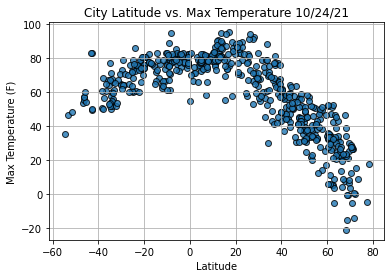

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

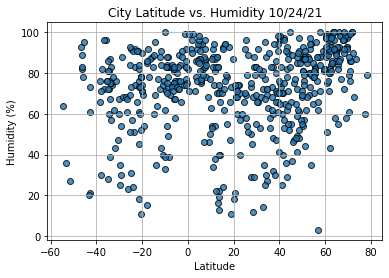

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

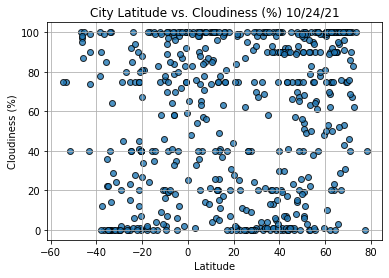

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

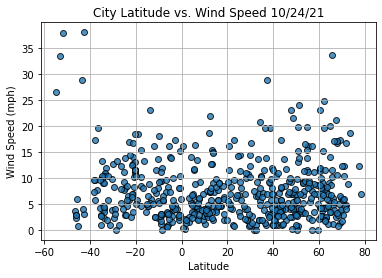

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2021-10-24 21:25:17
Lat                       69.4541
Lng                     -133.0374
Max Temp                     30.2
Humidity                       93
Cloudiness                     75
Wind Speed                   3.44
Name: 13, dtype: object

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

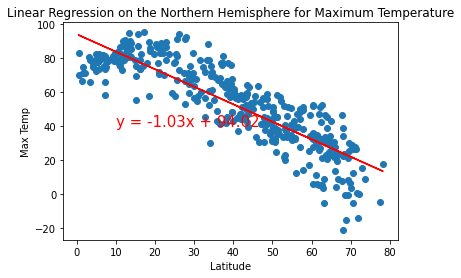

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

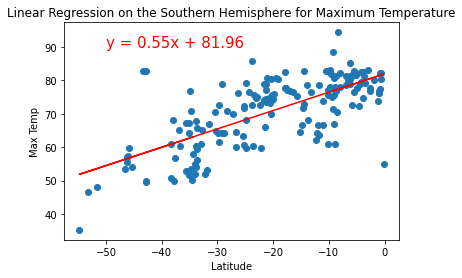

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

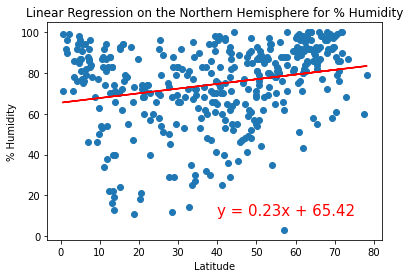

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

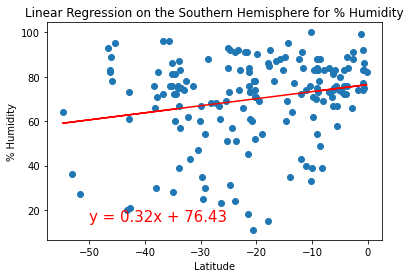

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

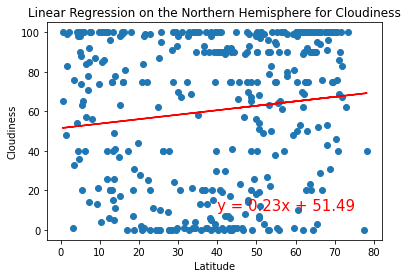

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

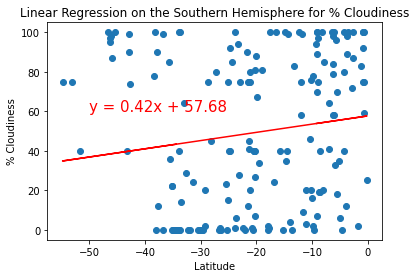

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

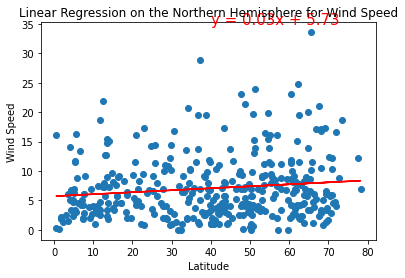

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

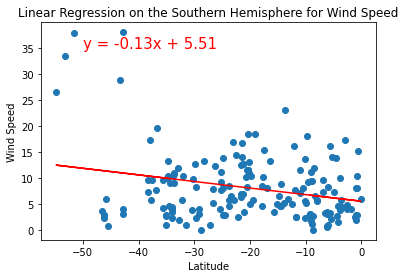

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))